<a href="https://colab.research.google.com/github/kalepravinkumars/2019-CS109A/blob/rgb_consideration/Manufacturing_Intelligence_ITR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessery liberis into the session
import os
from cv2 import imread,imshow,cvtColor,COLOR_BGR2RGB,COLOR_BGR2GRAY,COLOR_RGB2GRAY,resize
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU'))) #print no of GPU device

Num GPUs Available:  1


In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [5]:
#directiry name
dir512x512='/content/drive/MyDrive/Colab Notebooks/CastingProductImageData/casting_512x512/casting_512x512'

In [6]:
df_stats_def=pd.DataFrame()
# Get a list of all the files in the directory
extra='/def_front/'
directory=dir512x512+extra
files = os.listdir(directory)

# Filter the list to only include JPEG files
jpeg_files = [f for f in files if f.endswith('.jpeg')]
df_stats_def['filename']=jpeg_files


#img_flat_data=np.array([cvtColor(imread(dir512x512+extra+f), COLOR_BGR2GRAY).flatten() for f in jpeg_files])
#df_stats_def['mean']=[np.mean(cvtColor(imread(dir512x512+extra+f), COLOR_BGR2GRAY).flatten()) for f in jpeg_files]

img_flat_data=np.array([imread(dir512x512+extra+f).flatten() for f in jpeg_files])
df_stats_def['mean']=[np.mean(imread(dir512x512+extra+f).flatten()) for f in jpeg_files]

df_f=pd.DataFrame(img_flat_data)


# Get a list of all the files in the directory
extra='/ok_front/'
directory=dir512x512+extra
files = os.listdir(directory)
df_stats_ok=pd.DataFrame()

# Filter the list to only include JPEG files
jpeg_files = [f for f in files if f.endswith('.jpeg')]
df_stats_ok['filename']=jpeg_files


img_flat_data=np.array([imread(dir512x512+extra+f).flatten() for f in jpeg_files])
df_stats_ok['mean']=[np.mean(imread(dir512x512+extra+f).flatten()) for f in jpeg_files]
df_p=pd.DataFrame(img_flat_data)

In [7]:
df_p.head()

,0,1,2,3,4,5,6,7,8,9,...,786422,786423,786424,786425,786426,786427,786428,786429,786430,786431
0,230,230,230,230,230,230,230,230,230,231,...,219,219,219,219,219,219,219,219,219,219
1,142,142,142,142,142,142,142,142,142,142,...,176,176,176,176,176,176,176,176,176,176
2,206,206,206,206,206,206,206,206,206,206,...,229,229,229,229,229,229,229,229,229,229
3,196,196,196,195,195,195,194,194,194,194,...,206,206,206,206,206,206,206,206,206,206
4,184,184,184,184,184,184,184,184,184,184,...,131,131,131,131,131,131,131,131,131,131


In [8]:
df_stats_ok.head()

,filename,mean
0,cast_ok_0_1021.jpeg,157.919823
1,cast_ok_0_2060.jpeg,149.781364
2,cast_ok_0_1817.jpeg,140.542004
3,cast_ok_0_1573.jpeg,132.951736
4,cast_ok_0_1963.jpeg,134.799217


In [9]:
df_stats_def.head()

,filename,mean
0,cast_def_0_100.jpeg,143.840778
1,cast_def_0_1053.jpeg,131.359814
2,cast_def_0_102.jpeg,142.420483
3,cast_def_0_1046.jpeg,133.569351
4,cast_def_0_1015.jpeg,132.420723


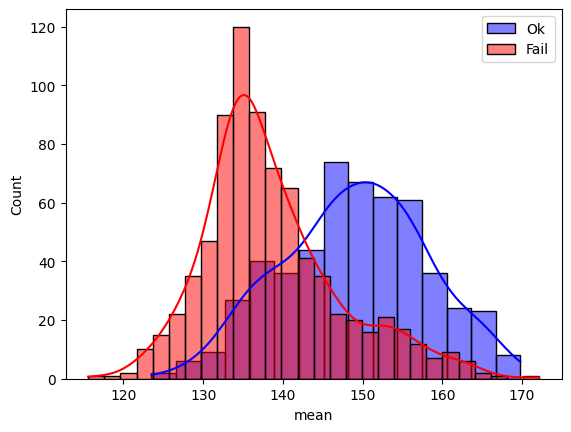

In [10]:
sns.histplot(df_stats_ok['mean'], label='Ok', color='blue', alpha=0.5, kde=True)
sns.histplot(df_stats_def['mean'], label='Fail', color='red', alpha=0.5, kde=True)
# Add legend
plt.legend()

In [11]:
#df_f=df_f[:300]
df_f.shape

(781, 786432)

In [12]:
#df_p=df_p[:300]
df_p.shape

(519, 786432)

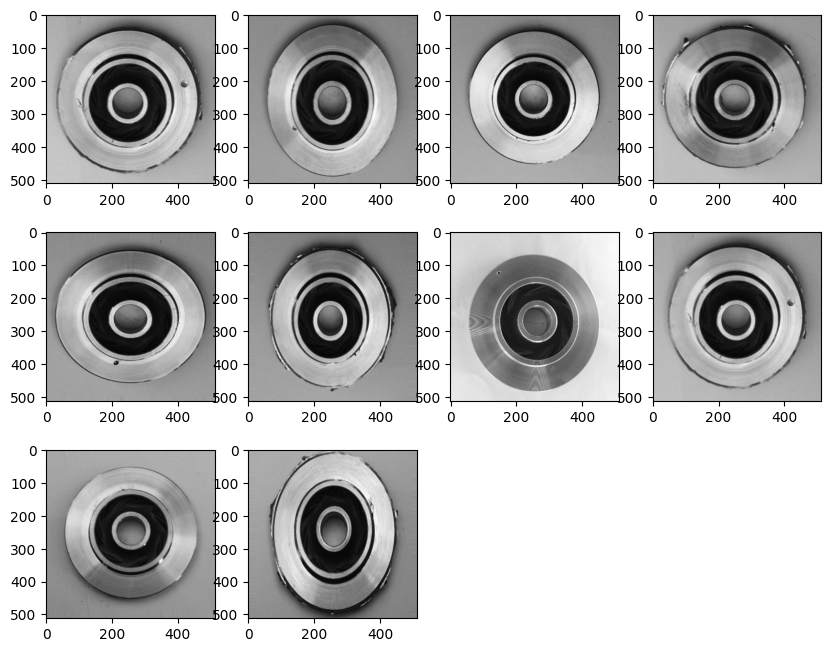

In [13]:
#Fail or NoOkey or defective parts
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(df_f.iloc[i:i+1,:].values.reshape(512,512,3))

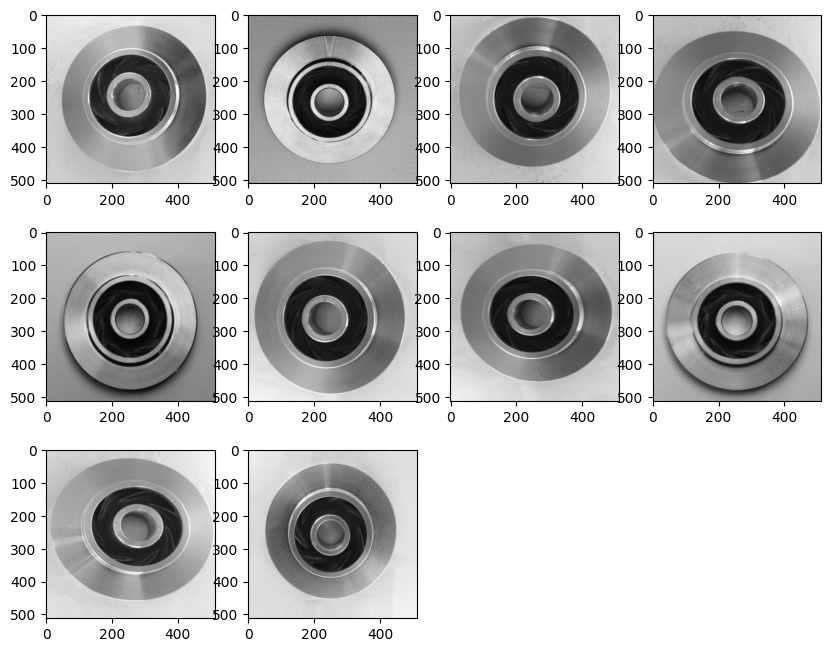

In [14]:
#Pass or Okey or without defect parts
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(df_p.iloc[i:i+1,:].values.reshape(512,512,3))

In [15]:
# Define Y or resonse
# 0 means Fail, and 1 mean Pass

df_f['Y']=0
df_p['Y']=1

In [16]:
#Combine two dataframe
df=pd.concat([df_f,df_p], axis=0)
df.index=range(df.shape[0])
df.shape

(1300, 786433)

In [17]:
#importing the Liberiers to create model
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Convolution2D,MaxPool2D,Flatten
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
X=df.drop(labels='Y', axis=1)

X=X.values.reshape(X.shape[0],512,512,3)
#X=np.expand_dims(X, axis=-1)

Y=df[['Y']].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
Xtrain, Xtest, ytrain, ytest=train_test_split(X,Y,test_size=0.30,random_state=101 )

Model 2

In [21]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=16,kernel_size=(3,3), activation='relu', input_shape=(512,512,3)))
model.add(tf.keras.layers.MaxPool2D(
    (2,2)))

model.add(tf.keras.layers.Conv2D(
    filters=32,kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(
    (2,2)))

model.add(tf.keras.layers.Conv2D(
    filters=64,kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(
    (2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping=EarlyStopping(monitor='val_accuracy', patience=5, mode='min')

In [22]:
model.fit(Xtrain,ytrain, epochs=20, batch_size=64, validation_data=(Xtest,ytest), callbacks=[early_stopping])

Epoch 1/20
15/15 [==============================] - 18s 422ms/step - loss: 231.1497 - accuracy: 0.5297 - val_loss: 0.5899 - val_accuracy: 0.6641
Epoch 2/20
15/15 [==============================] - 3s 229ms/step - loss: 0.5746 - accuracy: 0.7033 - val_loss: 0.5732 - val_accuracy: 0.6974
Epoch 3/20
15/15 [==============================] - 3s 230ms/step - loss: 0.3936 - accuracy: 0.8209 - val_loss: 0.5176 - val_accuracy: 0.7513
Epoch 4/20
15/15 [==============================] - 4s 247ms/step - loss: 0.2443 - accuracy: 0.9022 - val_loss: 0.4949 - val_accuracy: 0.8103
Epoch 5/20
15/15 [==============================] - 4s 260ms/step - loss: 0.1347 - accuracy: 0.9527 - val_loss: 0.5087 - val_accuracy: 0.8256
Epoch 6/20
15/15 [==============================] - 4s 248ms/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.5782 - val_accuracy: 0.8333


In [26]:
ytest_pred=model.predict(Xtest)

13/13 [==============================] - 0s 36ms/step


In [27]:
for i in range(len(ytest_pred)):
    if ytest_pred[i]>0.5:
        ytest_pred[i]=1
    else:
        ytest_pred[i]=0

In [28]:
print(confusion_matrix(ytest,ytest_pred))
print(classification_report(ytest,ytest_pred))

[[213  37]
 [ 28 112]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       250
           1       0.75      0.80      0.78       140

    accuracy                           0.83       390
   macro avg       0.82      0.83      0.82       390
weighted avg       0.84      0.83      0.83       390



# segmentation to reduce the overlap area

In [ ]:
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image

# Load the pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))


In [ ]:

# Get a list of all the files in the directory
extra='\def_front\\'
extra='\ok_front\\'

for item in jpeg_files:
    image = cv2.imread(imread(dir512x512+extra+f))
    image = cv2.resize(image,(224,224))
    image = np.expand_dims(image, axis=0)
    
    image = preprocess_input(image)
    
    #
    # Extract features using VGG16
    features = vgg_model.predict(image)
    
    # Flatten the features
    flatten_features = features.flatten()
    
    # Print the shape of the flattened features
    print("Flattened Features Shape:", flatten_features.shape)

In [ ]:
a=df_p.iloc[0:1].values.reshape(512,512)
a=cv2.resize(a,(224,224))
print(a)

In [ ]:
with tf.device('/GPU:0'):
    model_1=Sequential([
    Convolution2D(filters=16,kernel_size=(3,3),input_shape=(256,256,1)),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=256,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=1, activation='sigmoid')    
    ])
    
    
    model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    batch_size=16
    dataset = tf.data.Dataset.from_tensor_slices((Xtrain, ytrain))
    dataset = dataset.batch(batch_size)
    
    history_1=model_1.fit(dataset, epochs=10, validation_data=(Xtest,ytest))

In [ ]:
!nvidia-smi

In [ ]:
model_1=Sequential([
    Convolution2D(filters=16,kernel_size=(3,3),input_shape=(256,256,1),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Convolution2D(filters=32,kernel_size=(3,3),input_shape=(256,256,1),activation='relu'),
    Flatten(),
#    Dense(units=128,activation='relu'),
#    Dense(units=64,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=1, activation='sigmoid')    
])


model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

batch_size=8
dataset = tf.data.Dataset.from_tensor_slices((Xtrain, ytrain))
dataset = dataset.batch(batch_size)

history_1=model_1.fit(dataset, epochs=10,validation_data=(Xtest,ytest))

In [ ]:
# Evaluate the model on test dataset
y_pred_train = model_1.predict(Xtrain)
y_pred_test = model_1.predict(Xtest)

#Get the predicted value in between 0 & 1
y_pred_train=(y_pred_train>=0.5).astype(int)
y_pred_test =(y_pred_test>=0.5).astype(int)

In [ ]:
# Generate classification report and confusion metrics to evaluate model: Test dataset
class_erport=classification_report(ytest,y_pred_test)
print('class_erport:--------------------')
print(class_erport)

conf_matrix=confusion_matrix(ytest,y_pred_test)
print('conf_matrix:--------------------')
print(conf_matrix)

plt.figure(figsize=(5,3))
target_names=[0,1]
plt.imshow(conf_matrix, cmap='binary', interpolation='None')
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar()